# Bungee jumping

Notations:

$x$ = vertical distance measured from point of jump, positive downwards

$M$ = mass of jumper

$L$ = unstretched length of bungee cord

$k$ = elastic constant of cord, i.e. magnitude of force = $kx$ 

$g$ = earth's gravitational acceleration, Force = $Mg$

Total force downwards (ignoring air resistance):  $F(x) = Mg$ if $x \le L$; otherwise $F(x) = Mg-k(x-L)$.

Bungee jump equation is then

$\frac{d^2x}{dt^2} = G(x)$

with $G(x) = g$ if $x\le L$, else $G(x) = g - (k/M)*(x - L)$

Equivalently, in the form of two first-order equations (with the new variables $y_1 = x$, $y_2 = dx/dt$),

$\frac{dy_1}{dt} = y_2\,,\qquad \frac{dy_2}{dt} = G(y_1, y_2)$.

(We have allowed the possibility that $G$ depends on the two new variables, $y_1$ and $y_2$ - it depends only on $y_1$ (i.e. $x$) when air friction is ignored.  As can be seen below, $G$ will also depend on $y_2$ (i.e. $dx/dt$, the velocity) when air friction is included.

If an air resistance term proportional to the square of the velocity is considered, we need to include an addition force term 

$-\frac{c}{M}\,\left\vert\frac{dx}{dt}\right\vert\,\frac{dx}{dt} = -\frac{c}{M}\,\left\vert y_2\right\vert\,y_2$

where $\vert\cdot\vert$ denotes the absolute value, and $c$ is a positive constant (drag coefficient).

In [1]:
# import the required Python modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  # this is needed to integrate the differential equation(s)

The function $G$ below is the right-hand side of the set of first-order differential equations. 
Air resistance is ignored if $c = 0$.

$y$ here is a two-dimensional array, i.e. has two entries: our $y_1$ and $y_2$.  
In python, the counter starts at 0, so y[0] is the value of $y_1$ (position), 
and y[1] is the value of $y_2$ (velocity)

t is the corresponding time of the input $y_1$ and $y_2$ values

$G$ returns two values: $dy_1/dt$, $dy_2/dt$.  
By definition, $dy_1/dt$ is simply $y_2$, and $dy_2/dt$ (the acceleration) is given by the force equation.

In [12]:
# parameters
L = 15 # m
g = 9.8     # m/sec^2
M = 60.0    # kg
k = 120.0    # N/m
c = 2.5 #2.5  # approximate drag coefficient
tmax = 20   # s
ticks = 20*tmax

In [13]:

#global variables 
g = 9.8 # Earth's gravitational force constant 

def G(y, t, M=M, c=c):
    G1 = y[1]   # this is first value to be returned, dy_1/dt
    if (y[0] <= L):
        G2 = g - (c/M)*abs(y[1])*y[1]   # this is the second value to be returned, dy_2/dt
                                        # gravity & air resistance only, since cord is not stretched
    else:
        G2 = g - (k/M)*(y[0] - L) - (c/M)*abs(y[1])*y[1]    # cord stretched
                                            
    return [G1, G2]

In [18]:
y=[3, 4]
t=np.linspace(0, 10, 40)
G(y,t, M, c)

[4, 9.133333333333335]

In [6]:
# set up the various time points at which we want to solve for the positions and velocities
# equally space, between 0 and tmax, with the number of points = ticks (including tmax).
ts = np.linspace(0, tmax, ticks)

# initial conditions: stationary (velocity = 0) jumper at x = 0
y0 = [0.0, 0.0]

In [7]:
# integrate equation of motion
ys = odeint(G, y0, ts)
# after calling odeint, ys contains a series of doubles (y_1, y_2) at the time points specified earlier.

In [8]:
ys

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.23093755e-02,  4.91060132e-01],
       [ 4.92122751e-02,  9.81114385e-01],
       [ 1.10633223e-01,  1.46916508e+00],
       [ 1.96447109e-01,  1.95423085e+00],
       [ 3.06480211e-01,  2.43535444e+00],
       [ 4.40511562e-01,  2.91161012e+00],
       [ 5.98274755e-01,  3.38211049e+00],
       [ 7.79459982e-01,  3.84601276e+00],
       [ 9.83716422e-01,  4.30252422e+00],
       [ 1.21065488e+00,  4.75090704e+00],
       [ 1.45985063e+00,  5.19048208e+00],
       [ 1.73084644e+00,  5.62063200e+00],
       [ 2.02315574e+00,  6.04080341e+00],
       [ 2.33626585e+00,  6.45050823e+00],
       [ 2.66964126e+00,  6.84932419e+00],
       [ 3.02272696e+00,  7.23689459e+00],
       [ 3.39495167e+00,  7.61292734e+00],
       [ 3.78573106e+00,  7.97719335e+00],
       [ 4.19447086e+00,  8.32952436e+00],
       [ 4.62056982e+00,  8.66981026e+00],
       [ 5.06342257e+00,  8.99799603e+00],
       [ 5.52242230e+00,  9.31407834e+00],
       [ 5.

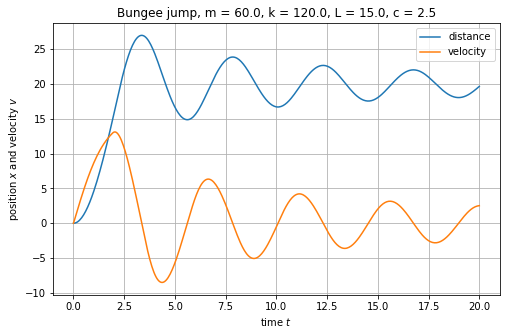

In [35]:
# plot position and velocity as function of time
plt.figure(figsize=(8,5))
plt.xlabel("time $t$")
plt.ylabel("position $x$ and velocity $v$")
plt.title("Bungee jump, m = %.1f" % M + ", k = %.1f" % k + ", L = %.1f" % L
         + ", c = %.1f" % c)
plt.grid()
plt.plot(ts, ys)
plt.legend(("distance", "velocity"), loc=0)
plt.show()

Can you tell (deduce!) which curve is that of the position and which of the velocity?

We plot below the position vs. the velocity (i.e. ys[t;0] vs ys[t;1]).
If the mostion is periodic, we should see a closed curve/trajectory.  
**Can you articulate why this is true?**

Where do you think is the starting point (i.e. at $t=0$)?  In which direction is the curve traced out as time progresses?

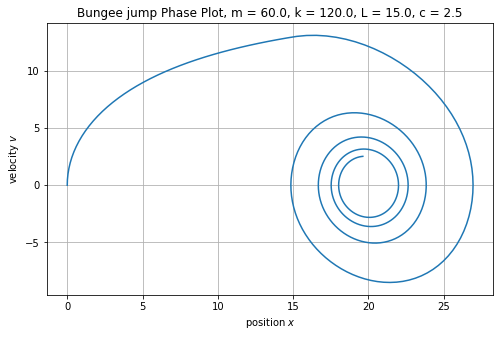

In [34]:
# phase plot: position vs velocity plot
plt.figure(figsize=(8,5))
plt.xlabel(r"position $x$")
plt.ylabel(r"velocity $v$")
plt.title("Bungee jump Phase Plot, m = %.1f" % M + ", k = %.1f" % k + ", L = %.1f" % L 
          + ", c = %.1f" % c)
plt.grid()

#: means all 
plt.plot(ys[:,0], ys[:,1]) #rows: 1st column (0) as x, rows: 2nd column is y 
plt.show()

In the next cell, we plot the acceleration (i.e. $d^x/dt^2$, or $dy_2/dt$ as a function of time.
This is not in the solution ys, but can be computed for the pre-specified time points by computing the force and dividing it out by the mass $M$.

Note that if a force from 4g to 6g is sustained for more than a few seconds, the resulting symptoms range from visual impairment to total blackout.

In [2]:
# acceleration as a function of time

a = np.zeros(ticks)  # we then initiate/create a similar length series, a, and fill it with zeros.

for i in range(0, ticks):   # at each time point
    f = G(ys[i,:], ts[i])   # compute the dy_1/dt and dy_2/dt using the computed value of y_1 and y_2
                            # note that we only need dy_2/dt, i.e. the acceleration
        
    a[i] = f[1]/g   # divide out by g, so that the values of a is in units of g
    
plt.figure(figsize=(8,5))
plt.xlabel(r"time $t$")
plt.ylabel(r"acceleration (units of $g$)")
plt.title("Bungee jump, m = %.1f" % M + ", k = %.1f" % k + ", L = %.1f" % L 
          + ", c = %.1f" % c + "\n Acceleration the jumper is subjected to")
plt.grid()
plt.plot(ts, a)

NameError: name 'np' is not defined

In [1]:
f

NameError: name 'f' is not defined

Now, you run the codes with some nonzero $c$, i.e. include air resistance.  Can you give some explanation of each of the graphs you see?